In [1]:
import sys
sys.path.append('..')

from baselines.gnn.trainer import Trainer

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


Epoch 1/200, Train Loss: 2874697.4273, lr: 0.001
Val Loss: 21051.2340
---------
Epoch 2/200, Train Loss: 6334.5886, lr: 0.001
Val Loss: 2370.1857
---------
Epoch 3/200, Train Loss: 1734.3174, lr: 0.001
Val Loss: 285.1507
---------
Epoch 4/200, Train Loss: 211.5879, lr: 0.001
Val Loss: 379.1445
---------
Epoch 5/200, Train Loss: 297.6110, lr: 0.001
Val Loss: 116.6057
---------
Epoch 6/200, Train Loss: 227.1867, lr: 0.001
Val Loss: 213.0100
---------
Epoch 7/200, Train Loss: 112.3796, lr: 0.001
Val Loss: 205.8454
---------
Epoch 8/200, Train Loss: 203.2186, lr: 0.001
Val Loss: 135.9177
---------
Epoch 9/200, Train Loss: 129.1462, lr: 0.001
Val Loss: 145.5931
---------
Epoch 10/200, Train Loss: 78.6075, lr: 0.001
Val Loss: 148.6901
---------
Epoch 11/200, Train Loss: 132.7657, lr: 0.001
Val Loss: 105.9897
---------
Epoch 12/200, Train Loss: 101.1263, lr: 0.001
Val Loss: 128.7733
---------
Epoch 13/200, Train Loss: 72.5686, lr: 0.001
Val Loss: 135.3227
---------
Epoch 14/200, Train Loss: 1

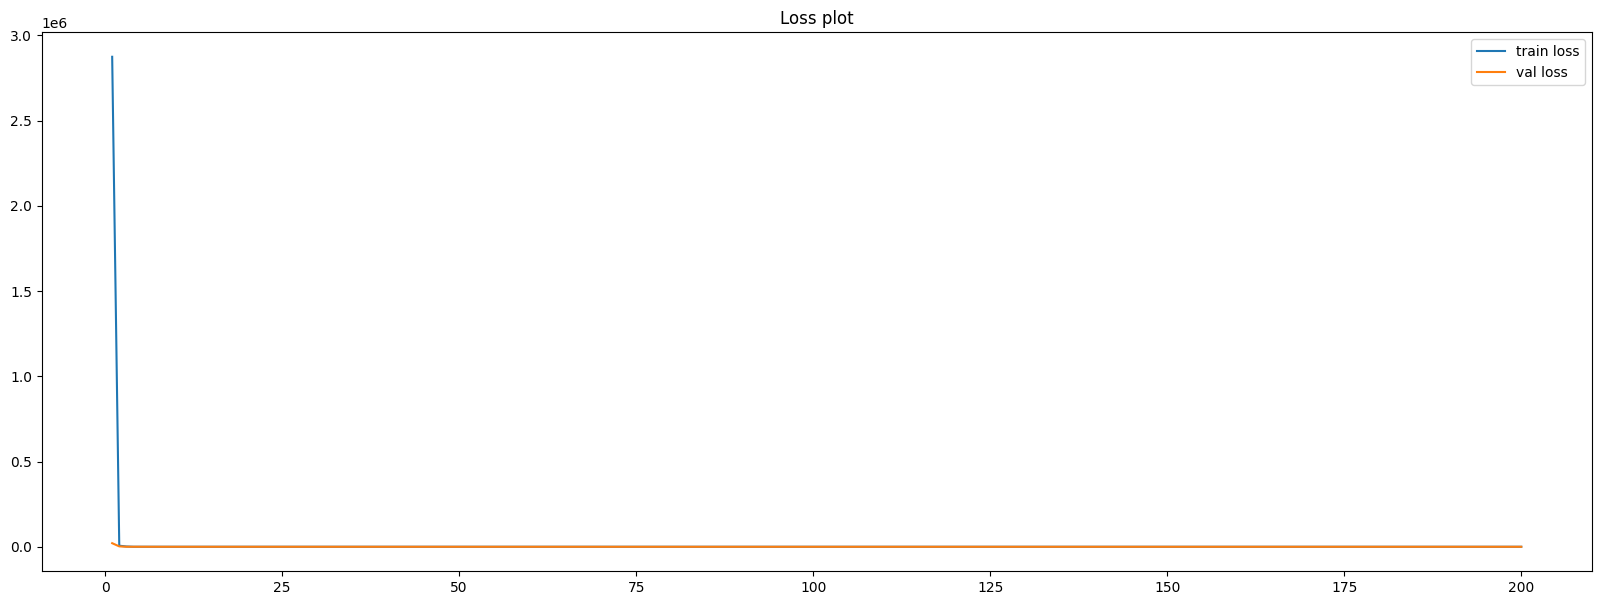

In [2]:
trainer = Trainer(architecture='cgcn', subset=5, hidden_dim=1024)
trainer.train(num_epochs=200)

In [3]:
# next(iter(trainer.train_loader)).x.shape

#### Best overfit [A3TGCN]:
 
---------

Epoch 3495/100000, Train Loss: 7.5034, lr: 7.450580596923828e-12

Val Loss: 107.1638

Early stopping ....

760.0785973072052 [s]

---------

#### Best overfit [CGCN] - 2nd record of a batch is very bad:

---------

Epoch 200/200, Train Loss: 11.7753, lr: 6.25e-05

Val Loss: 22.0974

231.39477968215942 [s]

---------

#### Best overfit [GCN] - 1st record of a batch looks noisy on plots:

---------

Epoch 200/200, Train Loss: 11.5612, lr: 0.000125

Val Loss: 125.7670

98.19415307044983 [s]

---------

MAE for f0: 3.6942718029022217
MAE for f1: 20.045007705688477
MAE for f2: 0.13965824246406555
MAE for f3: 2.828795909881592
MAE for f4: 2.1356122493743896
MAE for f5: 0.0003138360334560275


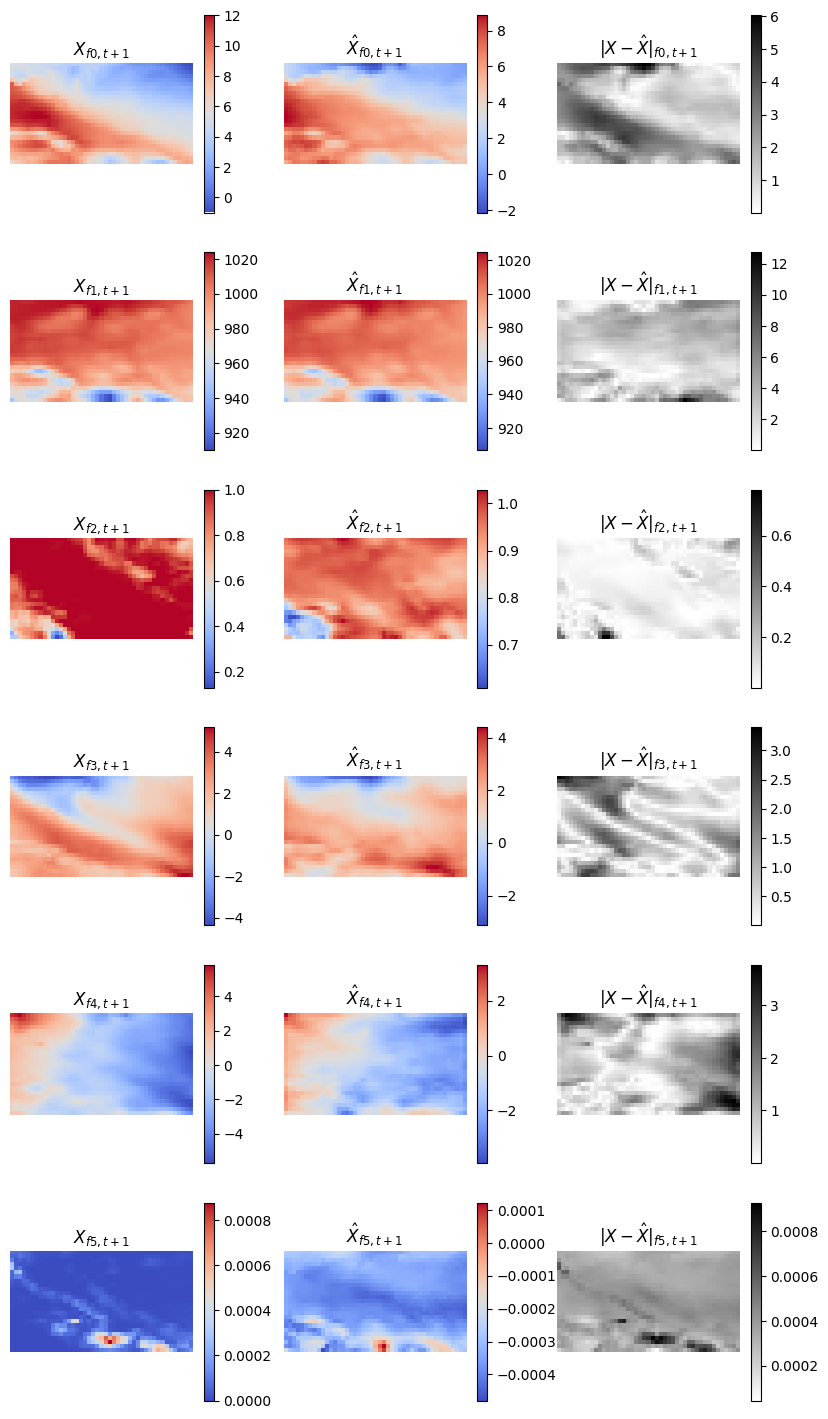

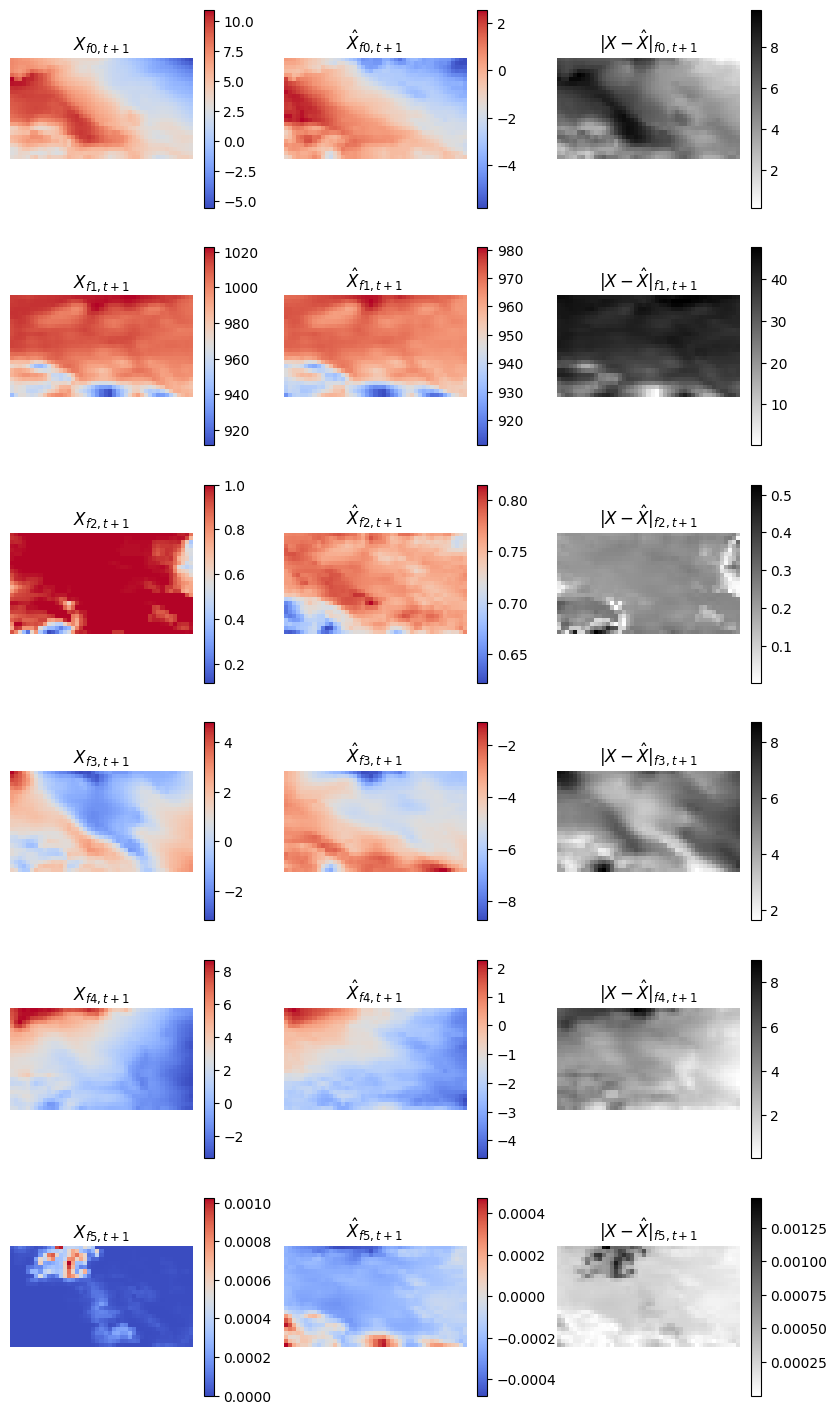

In [4]:
# something is wrong with second record inside a batch, first one overfits very well
trainer.plot_predictions(data_type='train')

MAE for f0: 4.593135356903076
MAE for f1: 18.139432907104492
MAE for f2: 0.2770233154296875
MAE for f3: 2.2927088737487793
MAE for f4: 2.6481878757476807
MAE for f5: 0.00038138244417496026


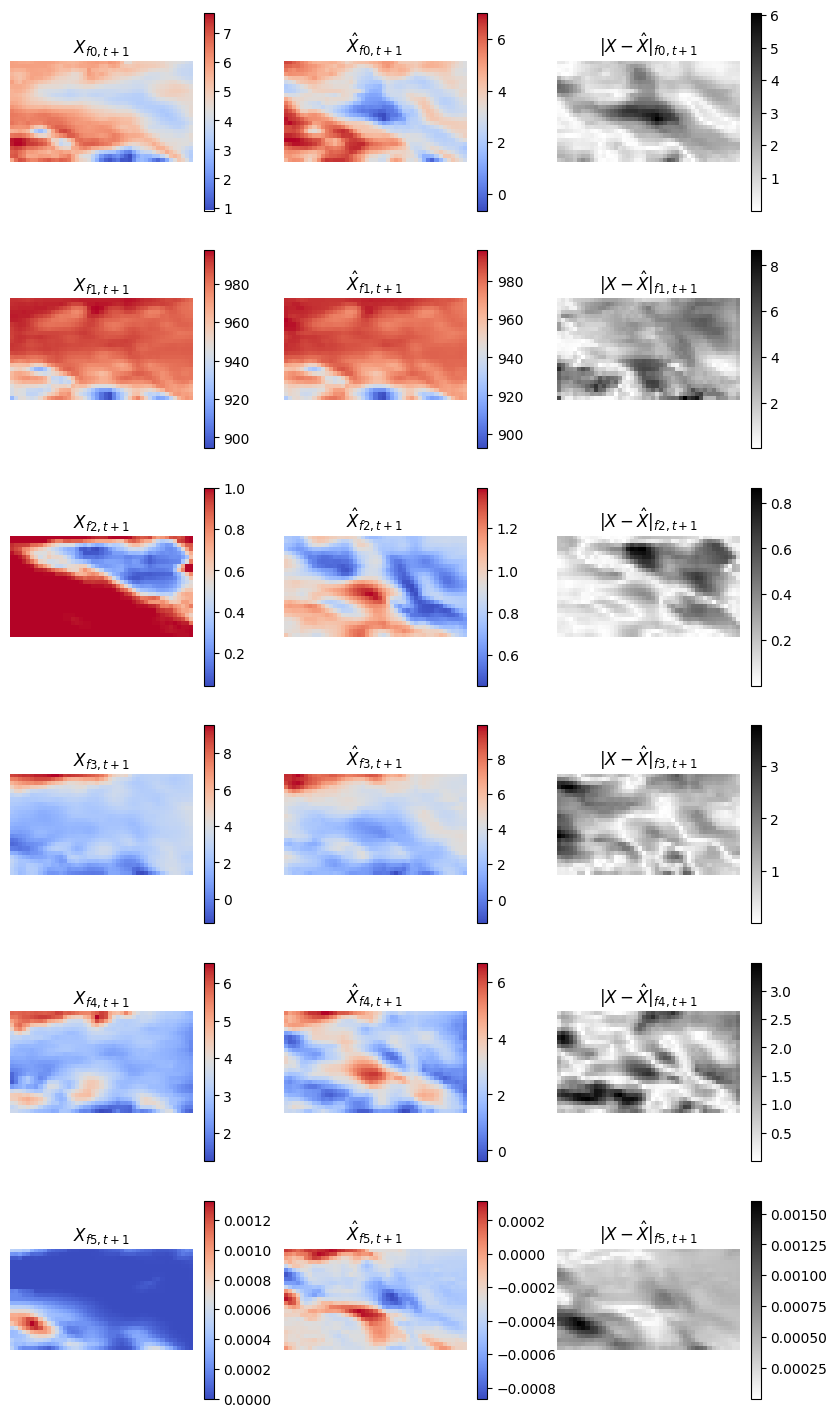

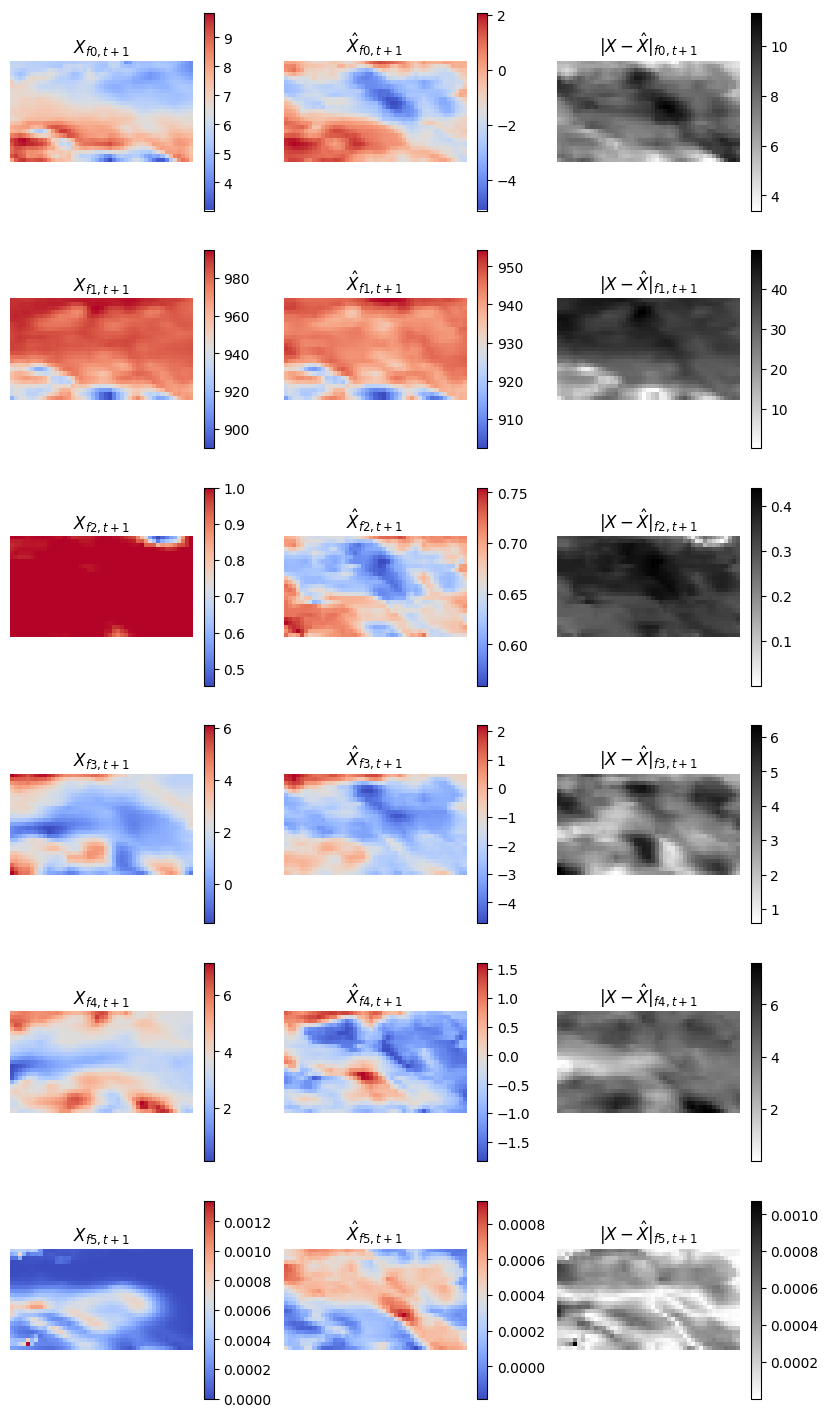

In [5]:
trainer.plot_predictions(data_type='test')